1. Duplicated rows:
Empty DataFrame
Columns: [S.No., Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price]
Index: []

2. Missing values:
S.No.                   0
Name                    0
Location                0
Year                    1
Kilometers_Driven       1
Fuel_Type               2
Transmission            1
Owner_Type              2
Mileage                 3
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

3. Data Reduction:
                               Name    Location    Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010.0            72000.0   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0            41000.0   
2                      Honda Jazz V     Chennai  2011.0            46000.0   
3                 Maruti Ertiga VDI     Chennai  2012.0            87000.0   
4  

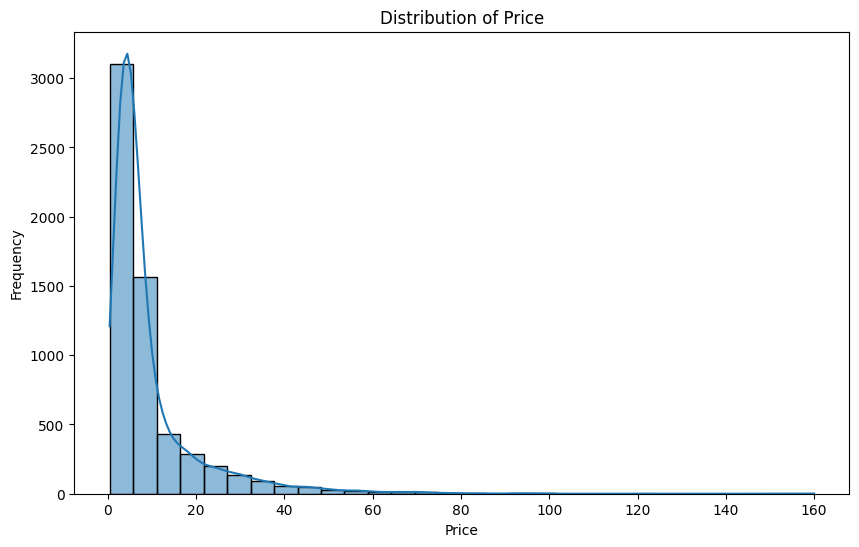


9. Data Transformation:
   Mileage  Engine   Power
0    26.60   998.0   58.16
1    19.67  1582.0  126.20
2    18.20  1199.0   88.70
3    20.77  1248.0   88.76
4    15.20  1968.0  140.80

Final DataFrame:
                               Name    Location    Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010.0            72000.0   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0            41000.0   
2                      Honda Jazz V     Chennai  2011.0            46000.0   
3                 Maruti Ertiga VDI     Chennai  2012.0            87000.0   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0            40670.0   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50   
3    Diesel   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/cars_data.csv'
df = pd.read_csv(file_path)

# 1. Check for Duplication
duplicated_rows = df[df.duplicated()]
print("1. Duplicated rows:")
print(duplicated_rows)

# 2. Missing Values Calculation
missing_values = df.isnull().sum()
print("\n2. Missing values:")
print(missing_values)

# 3. Data Reduction
# Drop columns that do not add value to analysis
columns_to_drop = ['S.No.', 'New_Price']
df = df.drop(columns=columns_to_drop)
print("\n3. Data Reduction:")
print(df.head())

# 4. Feature Engineering
# Example: Extracting car brand from the 'Name' column
df['Brand'] = df['Name'].apply(lambda x: x.split(' ')[0])
print("\n4. Feature Engineering:")
print(df[['Name', 'Brand']].head())

# 5. Creating Features
# Example: Creating a binary feature for cars with automatic transmission
df['IsAutomatic'] = np.where(df['Transmission'] == 'Automatic', 1, 0)
print("\n5. Creating Features:")
print(df[['Transmission', 'IsAutomatic']].head())

# 6. Data Cleaning/Wrangling
# Example: Handling missing values in the 'Seats' column by filling with the median
df['Seats'].fillna(df['Seats'].median(), inplace=True)
print("\n6. Data Cleaning/Wrangling:")
print(df[['Seats']].head())

# 7. Statistics Summary
statistics_summary = df.describe(include='all')
print("\n7. Statistics Summary:")
print(statistics_summary)

# 8. Analyzing/Visualizing the dataset by taking one variable at a time
# Example: Visualize the distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 9. Data Transformation
# Example: Converting 'Mileage', 'Engine', and 'Power' to numeric values
df['Mileage'] = df['Mileage'].str.rstrip(' km/kg').str.rstrip(' kmpl').astype('float')
df['Engine'] = df['Engine'].str.rstrip(' CC').astype('float')

# Handling 'null bhp' in 'Power' by replacing with NaN and then filling with median
df['Power'] = df['Power'].replace('null bhp', np.nan)
df['Power'] = df['Power'].str.rstrip(' bhp').astype('float')
df['Power'].fillna(df['Power'].median(), inplace=True)
print("\n9. Data Transformation:")
print(df[['Mileage', 'Engine', 'Power']].head())

print("\nFinal DataFrame:")
print(df.head())

df.to_csv('/content/cleaned_cars_data.csv', index=False)


<ipython-input-17-dfb4374e2ad9>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


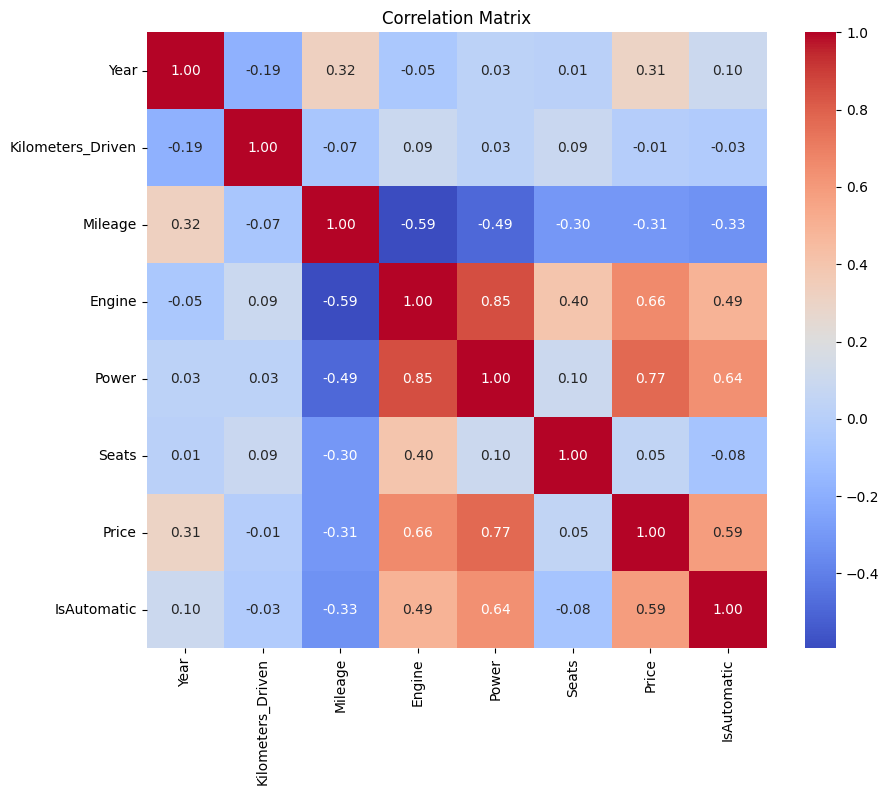

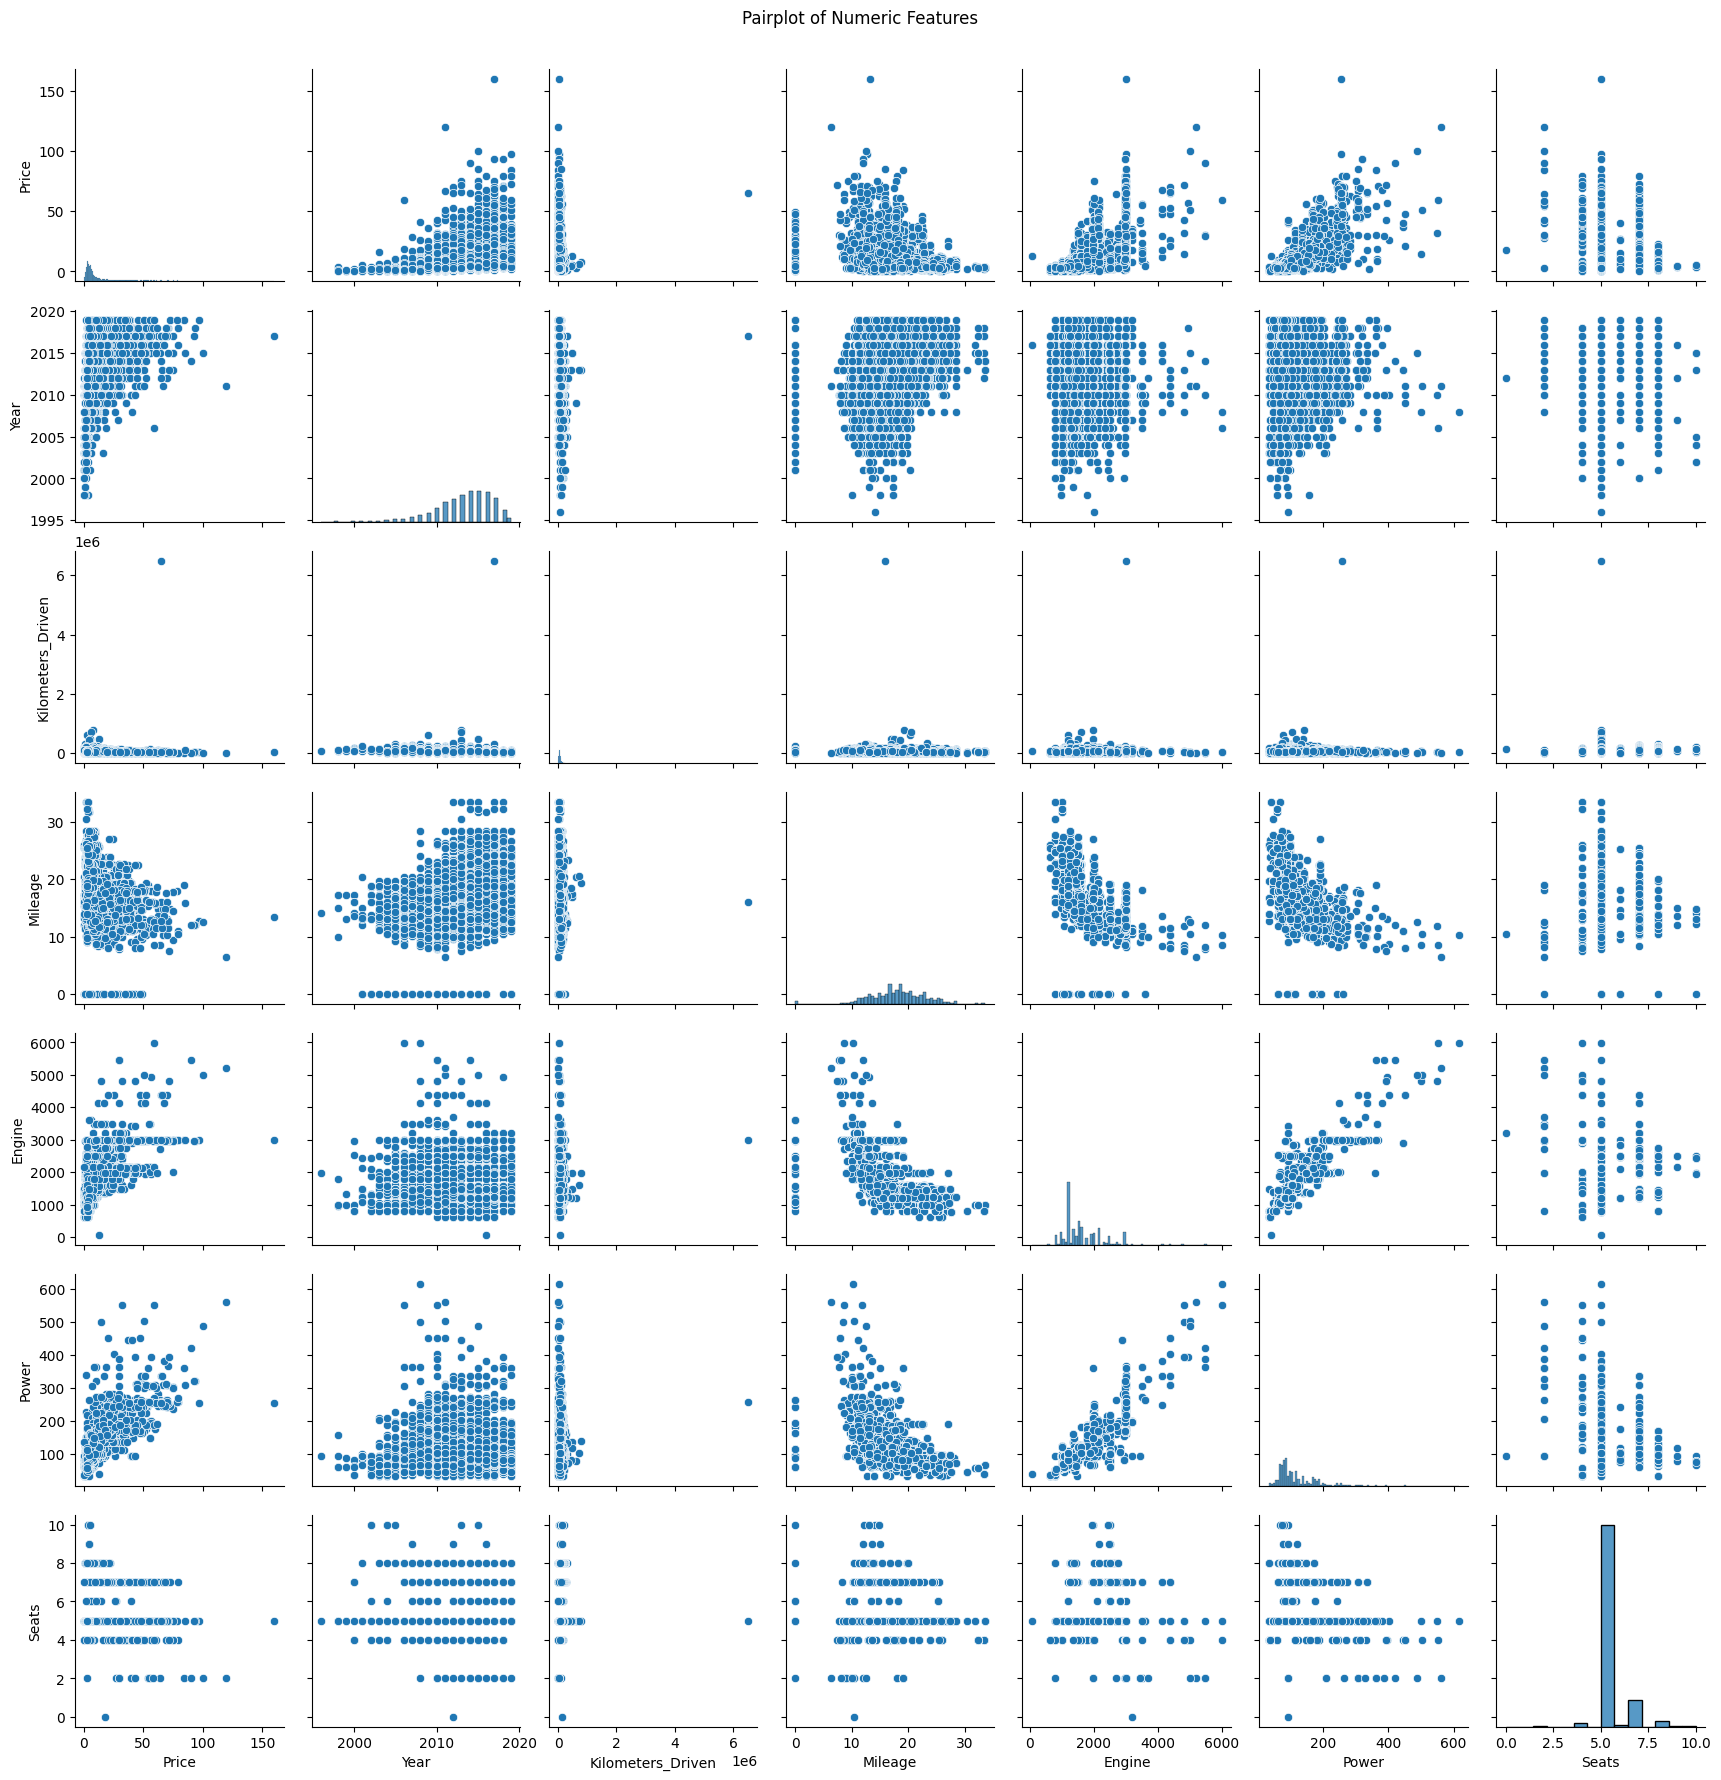

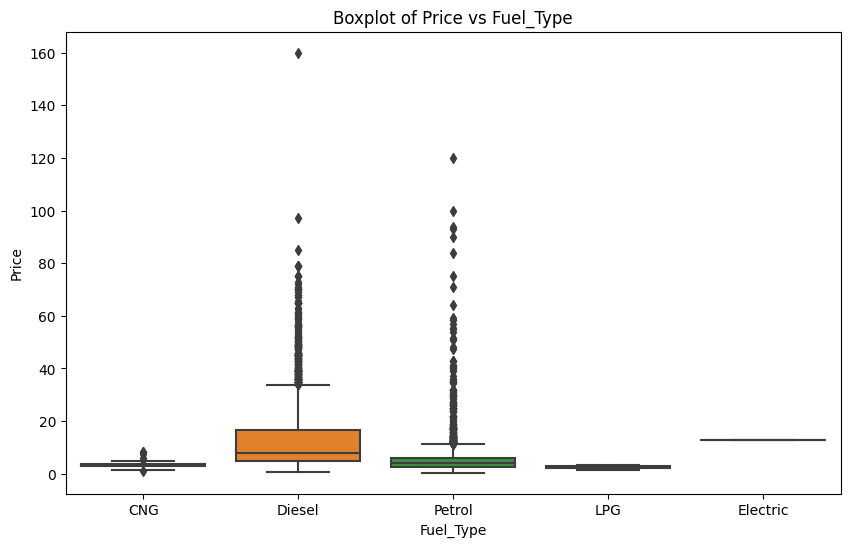

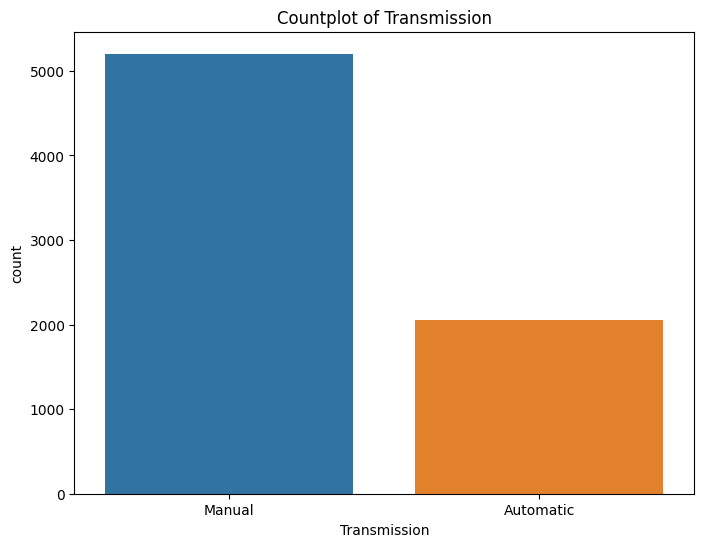

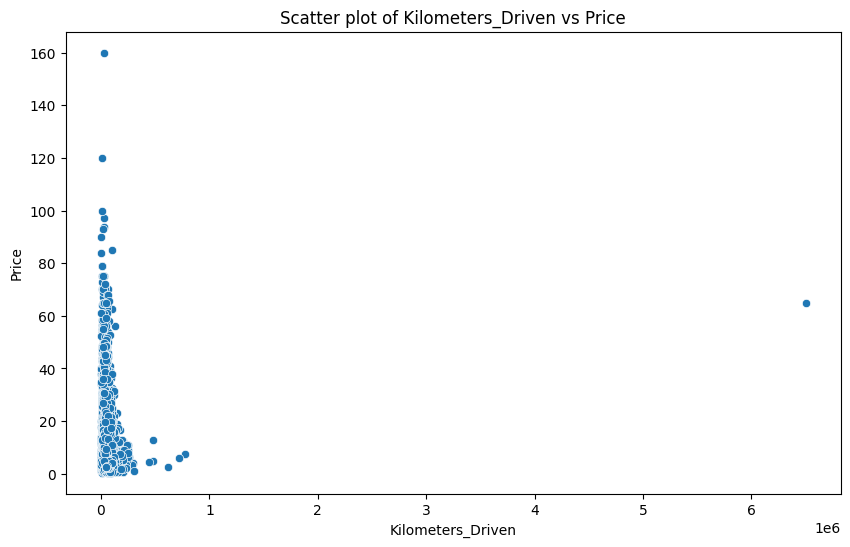

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/cleaned_cars_data.csv'
df = pd.read_csv(file_path)

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# Boxplot for Price vs Fuel_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Boxplot of Price vs Fuel_Type')
plt.show()

# Countplot for Transmission
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Countplot of Transmission')
plt.show()

# Scatter plot for Kilometers_Driven vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)
plt.title('Scatter plot of Kilometers_Driven vs Price')
plt.show()
